## 7장 선형회귀 모델

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn import datasets

boston 데이터셋의 RM feature 설명

RM: 주택당 평균 방 개수
"RM"은 보스턴 주택 데이터셋의 각 주택당 평균 방 개수를 나타냅니다. 이 특성은 주택의 크기와 공간적인 측면에 대한 정보를 제공합니다.

방의 개수는 주택의 크기와 공간의 여유를 나타내는 경향이 있습니다. 보통 방의 개수가 많을수록 주택은 더 크고 넓다는 것을 의미합니다. 따라서 방의 개수는 주택의 가격이나 가치에 영향을 줄 수 있습니다.

주택 가격을 예측하는 모델을 구축하는 경우, "RM"은 유용한 특성으로 간주될 수 있습니다. 방의 개수가 많은 주택은 일반적으로 더 높은 가격을 가지는 경향이 있기 때문입니다. 이러한 특성을 활용하여 주택 가격 예측이나 회귀 분석 작업을 수행할 수 있습니다.

보스턴 데이터셋에서 "RM" 특성은 각 서브어(동네)의 주택마다의 평균 방 개수를 나타내며, 이를 활용하여 다양한 분석과 예측 모델링 작업을 수행할 수 있습니다

In [62]:
# 학습용 데이터 준비
boston = datasets.fetch_openml(name='boston', version=1)
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names
print('원본 데이터', x_org.shape, yt.shape)
print('항목 이름: ', feature_names)

# RM 데이터
x_data = np.array(x_org['RM']).reshape(-1, 1) # numpy.reshape(a, newshape, order='C')
print(f"RM 데이터 {x_data.shape}")

# 매트릭스 형태로 만들기 위해 RM(객실수) 이외의 값인 1인 더미 변수 추가
x = np.insert(x_data, 0, 1.0, axis=1) # numpy.insert(arr, obj, values, axis=None)
print(f"더미 변수 추가 후의 RM 데이터 {x.shape}")
print(f"x = {x}")

원본 데이터 (506, 13) (506,)
항목 이름:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
RM 데이터 (506, 1)
더미 변수 추가 후의 RM 데이터 (506, 2)
x = [[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]


c:\study\math4dl\math4dl\.conda\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [63]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [64]:
# 정답값 yt를 표시
print(yt[:5])

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


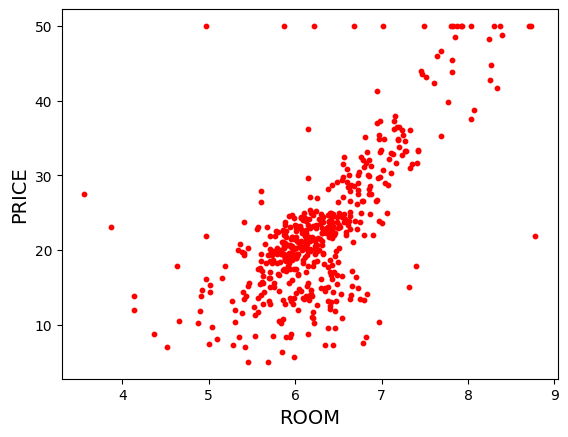

In [67]:
# 산점도를 표시
plt.scatter(x[:,1], yt, s=10, c='r')
plt.xlabel('ROOM', fontsize=14) # x(RM)
plt.ylabel('PRICE', fontsize=14) # yt(Price)
plt.show()

In [68]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산
# '@'은 내적을 의미하는 기호로 수식을 간단하게 표현할 수 있기 때문에 사용됨
def pred(x, w):
    return(x @ w)